Scisciの分析対象とするデータは、

データベースは商業データベース（Scopusなど）とオープンアクセスデータベースがあります。OAデータベースは以下を使うことが多く、pythonのライブラリも整備されています。([pyscisci](https://github.com/SciSciCollective/pyscisci)のgithubレポジトリより引用)

| Data Set      | Example |
| ----------- | ----------- |
| [Microsoft Academic Graph](https://docs.microsoft.com/en-us/academic-services/graph/) (MAG)      | [Getting Started with MAG](/examples/Getting_Started/Getting%20Started%20with%20MAG.ipynb)       |
| [Clarivate Web of Science](https://clarivate.com/webofsciencegroup/solutions/web-of-science/) (WoS)   | [Getting Started with WOS](/examples/Getting_Started/Getting%20Started%20with%20WOS.ipynb)        |
| [DBLP](https://dblp.uni-trier.de) | [Getting Started with DBLP](/examples/Getting_Started/Getting%20Started%20with%20DBLP.ipynb) |
| [American Physical Society](https://journals.aps.org/datasets) (APS) | [Getting Started with APS](/examples/Getting_Started/Getting%20Started%20with%20APS.ipynb) |
| [PubMed](https://www.nlm.nih.gov/databases/download/pubmed_medline.html) | [Getting Started with PubMed](/examples/Getting_Started/Getting%20Started%20with%20PubMed.ipynb) |
| [OpenAlex](https://openalex.org/) | [Getting Started with OpenAlex](/examples/Getting_Started/Getting%20Started%20with%20OpenAlex.ipynb) |

今回は、[webサイト](https://openalex.org/)のUIも含め、初めてでも使いやすい[OpenAlex](https://docs.openalex.org/)を使って分析をします。使うライブラリは [pyalex](https://github.com/J535D165/pyalex?tab=readme-ov-file#pyalex) です。

以下のpython notebookをgoogle colaboratory などのサービス上で動かしてみてください。

この章では、どのようなデータがどのような形式で取れるかをざっと確認します。

より詳しい説明は https://github.com/J535D165/pyalex?tab=readme-ov-file#pyalex を参照

In [ ]:
import sys
import os

%cd /content/sample_data/
!git clone https://github.com/ScisciJP/scisciJP2024_tutorial.git

sys.path.append('/content/sample_data/scisciJP2024_tutorial')
print(os.getcwd())
os.chdir('/content/sample_data/scisciJP2024_tutorial')
sys.path

In [45]:
# %pip install pyalex 
# %pip install japanize_matplotlib 
from pyalex import Works, Authors, Sources, Institutions, Concepts, Funders
import pyalex

import pandas as pd
import numpy as np
import math
import tqdm
import matplotlib.pyplot as plt
import japanize_matplotlib

import util

# pyalex.config.email = "your@email.address"
pyalex.config.email = "zhmuler@gmail.com"


In [5]:
# Open Alex　に収録されているデータの全数を見てみる

print(f"OpenAlexに収録されている論文数は　{Works().count():,}　件")
print(f"研究者数は　{Authors().count():,}　件")
print(f"機関数は　{Institutions().count():,}　件")
print(f"雑誌数は　{Sources().count():,}　件")
print(f"出資機関数　{Funders().count():,}　件")
print(f"Topic数は　{Concepts().count():,}　件")


OpenAlexに収録されている論文数は　249,569,918　件
研究者数は　90,413,165　件
機関数は　107,447　件
雑誌数は　251,994　件
出資機関数　32,437　件
Topic数は　65,073　件


# 論文のデータ

In [6]:
# 1950年から2023年のデータを対象とする
# Open Alexに1回問い合わせるたび約1秒かかるため、全体で75秒かかる
year_range = range(1950, 2024)

num_publish = [Works().filter(publication_year=i).select(["id"]).count() for i in year_range] # 2023年までに発行された論文を取得

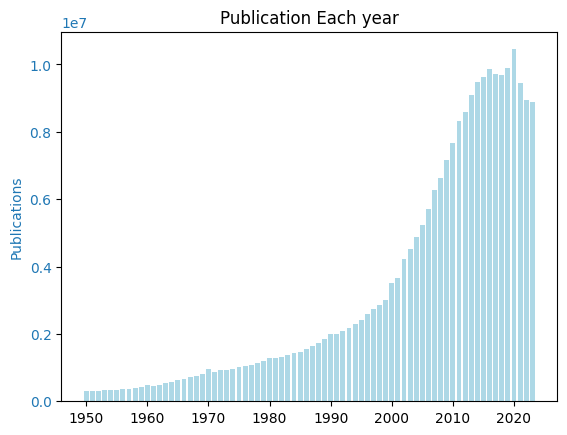

2010年以降、合計 123,279,315 件が発行されている


In [18]:
# グラフを描画
x = np.arange(year_range[0], year_range[-1]+1)

plt.ylabel('Publications', color='tab:blue')
plt.bar(x, num_publish, width=0.8, color='lightblue', label='Publications each year')
plt.tick_params(axis='y', labelcolor='tab:blue')
plt.title("Publication Each year")
plt.show()

print(f"2010年以降、合計 { Works().filter(publication_year='>2010').select(['id']).count() :,} 件が発行されている")

# 論文数は指数関数的に増加、2010年代には毎年1000万本近く発行されている。
# つまり、OpenAlexに収録される1970年以降発行された論文 2億件あまりのうちおよそ半分がここ10年で発行されている。

In [19]:
# 分野ごと論文数(1970と2020を比較)。分野はopenalexが定義した分野であり、4階層に分かれている。
fields = pd.read_csv("./supplementary/domain_field_mapping.csv").set_index("field_id")
for i in range(11,37):
    fields.loc[i,"n_1970"] = Works().filter(publication_year= 1970, primary_topic={"field":{"id":i}}).count()
    fields.loc[i,"n_2020"] = Works().filter(publication_year= 2020, primary_topic={"field":{"id":i}}).count()
fields.sort_values(by="domain_id")

,field_name,domain_id,domain_name,n_1970,n_2020
field_id,,,,,
11,Agricultural and Biological Sciences,1,Life Sciences,71571.0,406574.0
13,"Biochemistry, Genetics and Molecular Biology",1,Life Sciences,54069.0,429682.0
30,"Pharmacology, Toxicology and Pharmaceutics",1,Life Sciences,5390.0,27781.0
28,Neuroscience,1,Life Sciences,11705.0,121093.0
24,Immunology and Microbiology,1,Life Sciences,8012.0,74896.0
12,Arts and Humanities,2,Social Sciences,54157.0,503013.0
14,"Business, Management and Accounting",2,Social Sciences,9859.0,305594.0
33,Social Sciences,2,Social Sciences,95797.0,1577180.0
32,Psychology,2,Social Sciences,17532.0,279021.0


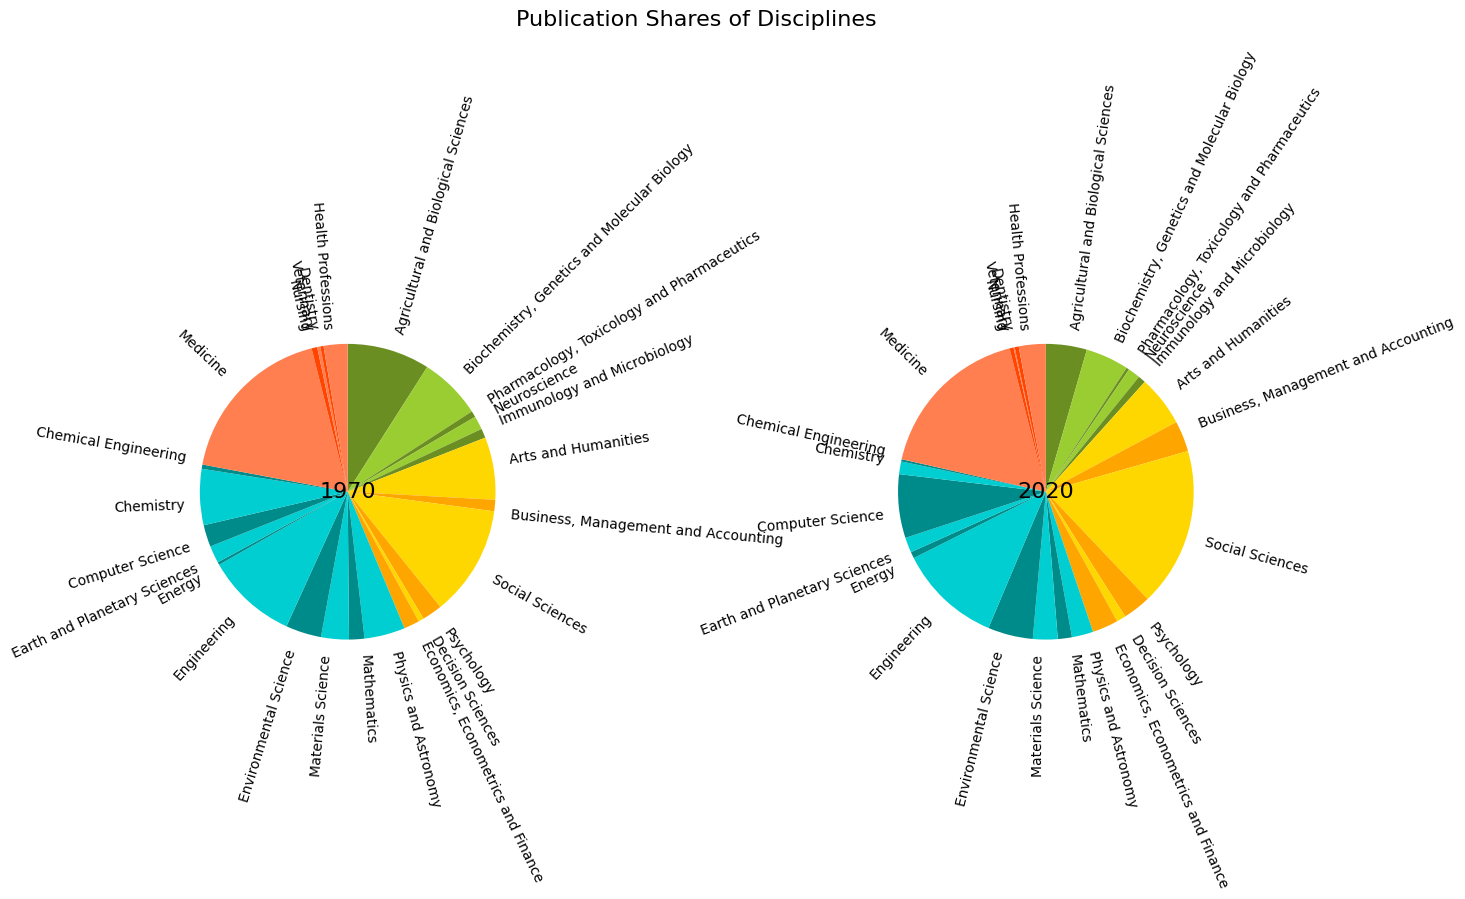

In [21]:
# 1970年、2020年の出版数を分野別の比率で比較
fields_sorted = fields.sort_values(by="domain_id")

# 割合を計算
labels = fields_sorted["field_name"]
sizes = fields_sorted["n_1970"]/fields_sorted["n_1970"].sum()
sizes_2010 = fields_sorted["n_2020"]/fields_sorted["n_2020"].sum()

# 大分類ごとの色を定義
dark_colors = ['olivedrab','orange' ,'darkcyan', 'orangered'] 
light_colors = [ 'yellowgreen', 'gold','darkturquoise','coral']

# 大分類ごとに交互の色を割り当てる
colors_list = []
for i,d in enumerate(fields_sorted["domain_id"]):
    if(i%2==0):colors_list.append(dark_colors[d-1])
    if(i%2==1):colors_list.append(light_colors[d-1])

fig,ax =plt.subplots(1,2)
ax[0].pie(sizes, labels=labels, colors=colors_list,  startangle=90, rotatelabels=True,counterclock=False)
ax[1].pie(sizes_2010, labels=labels, colors=colors_list,  startangle=90, rotatelabels=True,counterclock=False)
ax[0].text(0, 0, '1970', fontsize=16, ha='center', va='center')
ax[1].text(0, 0, '2020', fontsize=16, ha='center', va='center')

plt.subplots_adjust(left=0,right=2)
plt.suptitle("Publication Shares of Disciplines",x=1.0,y=1.5,fontsize=16)
plt.show()

# 著者データ

In [22]:
# 著者数の推移を取得したいが、研究者がいつから研究を始めているかについての情報をopenalexは持っていない。各著者が最初に出版した年度で近似する。
# 実行には10,000人の著者に対して約2時間半かかるため、今回は取得済みのデータを使う。

# ids = util.getAll(Authors().sample(10000, seed=42).select(["id"]))

# authors = []
# for id in tqdm.tqdm(ids):
#     year = Works().filter(author={"id":id["id"]}).select(["publication_year"])\
#             .sort(publication_year="asc") \
#             .get()
#     if(len(year)>0):
#         authors.append({"id":id["id"],"year":year[0]["publication_year"]})
# authors = pd.DataFrame(authors)

# pd.to_pickle(authors, "./supplementary/first_publication.pickle")

authors = pd.read_pickle("./supplementary/first_publication.pickle")

Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [01:48,  2.16s/it]


NameError: name 'tqdm' is not defined

90413165.0 90413165


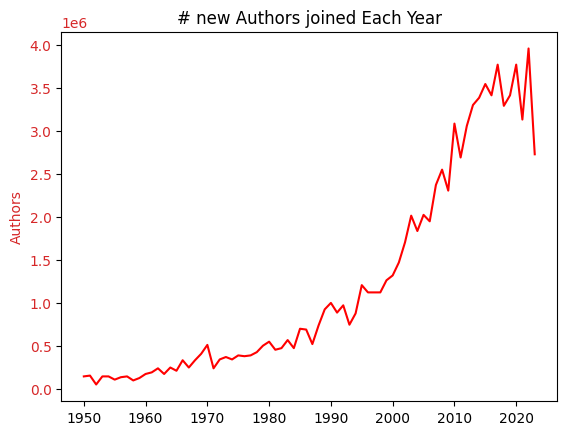

In [34]:
# 各年に対して、その年以前に最初の出版物を発行している研究者の割合を計算し、近似的に各年に存在した研究者数とする。
authors_share = np.array([len(authors[authors["year"]==i]) for i in year_range])/len(authors)

# 著者数の近似的な推移をプロット
plt.plot(x, authors_share*Authors().count(), color='r', label='Cumulative Authors')

plt.ylabel('Authors', color='tab:red')
plt.tick_params(axis='y', labelcolor='tab:red')
plt.title("# new Authors joined Each Year")

plt.show()


Gini 係数: 0.6827
参考：世界の経済格差 2005年の所得のGini 係数は 0.68、日本が0.33


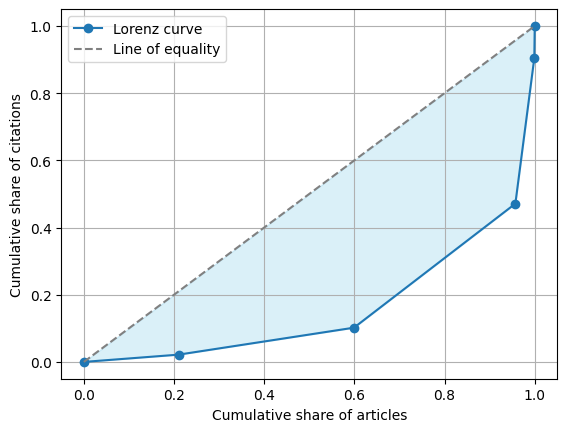

In [39]:
import numpy as np
import matplotlib.pyplot as plt

# 被引用数の偏り（Gini 係数）
cite_step = [1,2,10,100,1000]
papers_cited = [Works().filter(cited_by_count=f"<{i}").count() for i in cite_step]+[Works().count()] #CDF
# papers_cited_jp = [Works().filter(cited_by_count=f"<{i}", authorships={"countries":"JP"}).count() for i in cite_step]+[Works().filter(authorships={"countries":"JP"}).count()] #CDF

# 引用数と対応する論文数
def lorenz_curve(papers):
    paper_counts = np.array(papers[1:]) - np.array(papers[:-1]) #PDF
    citation_counts = paper_counts*np.array(cite_step)*0.3

    # 引用数と論文数の累積分布関数（CDF）を計算
    x_cumulative = [0 ]+list(np.cumsum(paper_counts) / np.sum(paper_counts))
    y_cumulative = [0 ]+list(np.cumsum(citation_counts) / np.sum(citation_counts))

    perfect_equality = np.linspace(0, 1, len(citation_counts))

    # ローレンツ曲線の描画
    plt.plot(x_cumulative, y_cumulative, label='Lorenz curve', marker='o')
    plt.plot([0, 1], [0, 1], '--',color='gray', label='Line of equality')
    plt.fill_between(x_cumulative, y_cumulative, x_cumulative, color='skyblue', alpha=0.3)
    plt.xlabel('Cumulative share of articles')
    plt.ylabel('Cumulative share of citations')
    plt.legend()
    plt.grid(True)

    # Gini係数の計算
    gini_index = 1 - 2 * np.trapz(y_cumulative, x=x_cumulative)
    print('Gini 係数:', f"{gini_index:.4}")

lorenz_curve(papers_cited)
# lorenz_curve(papers_cited_jp)
print("参考：世界の経済格差 2005年の所得の Gini 係数は 0.68、日本が0.33")

plt.show()

# 論文誌のデータ

In [40]:
# 大手"論文誌"（100万本以上論文が出ている論文誌）を取得。ただし、Sourceには、論文誌以外のレポジトリも含まれる点に注意が必要。以下では単純に「ジャーナル」と表現

source = Sources().filter(works_count=">1000000").get() 
print("100万本以上論文が出ている論文誌")
pd.DataFrame(map(lambda x: [x["display_name"], x["host_organization_name"], x["is_oa"],f'{x["works_count"]:,}'],source),
            columns=["論文誌名","論文誌発行機関","OA誌かどうか", "累計論文発行数"])


100万本以上論文が出ている論文誌


,論文誌名,論文誌発行機関,OA誌かどうか,累計論文発行数
0,PubMed,National Institutes of Health,False,"33,075,864"
1,PubMed Central,National Institutes of Health,True,"8,009,760"
2,Europe PMC (PubMed Central),European Bioinformatics Institute,True,"5,316,266"
3,arXiv (Cornell University),Cornell University,True,"3,015,170"
4,DOAJ (DOAJ: Directory of Open Access Journals),None,True,"2,672,478"
5,HAL (Le Centre pour la Communication Scientifi...,French National Centre for Scientific Research,True,"2,571,027"
6,Springer eBooks,Springer Nature,False,"2,519,831"
7,Zenodo (CERN European Organization for Nuclear...,European Organization for Nuclear Research,True,"1,405,433"
8,RePEc: Research Papers in Economics,Federal Reserve Bank of St. Louis,True,"1,126,422"
9,Social Science Research Network,RELX Group (Netherlands),False,"1,079,692"


In [41]:
# APC (Article Processing Charge: 論文投稿手数料)を課しているジャーナルを取得
journals = pd.DataFrame(util.getAll(\
    Sources().filter(apc_usd=">0")\
        .select(["id","display_name","summary_stats","apc_usd","works_count","country_code"])))
journals["country_code"].unique()

Fetching 11086 objects. it may takes 0.92 to 2.77 minutes


57it [01:04,  1.13s/it]


array(['CH', 'NL', 'GB', 'US', 'AU', 'DE', None, 'DK', 'IE', 'FR', 'HU',
       'JP', 'CA', 'CZ', 'RU', 'IT', 'AT', 'SG', 'BE', 'IN', 'KR', 'CN',
       'ES', 'BR', 'NZ', 'UG', 'UA', 'IR', 'RO', 'TW', 'ZA', 'BG', 'LT',
       'RS', 'SE', 'IL', 'HK', 'EG', 'SK', 'PL', 'ID', 'PK', 'NG', 'SA',
       'CL', 'FI', 'IQ', 'MX', 'HR', 'TR', 'EE', 'NP', 'GR', 'KE', 'MY',
       'AR', 'CO', 'PT', 'BA', 'SI', 'LV', 'NO', 'PH', 'MO', 'TH', 'BD',
       'ME', 'LY', 'KW', 'VN', 'PE', 'LB', 'CY', 'MK', 'AE', 'KG', 'MN',
       'AL', 'QA', 'KZ', 'GH', 'BY', 'YE', 'GU', 'BO', 'LK', 'GM'],
      dtype=object)

In [42]:
# 地域別のジャーナル分布と、有名ジャーナルのプロット
# h-indexは第4章で触れる研究のインパクト指標、2年間平均被引用数も同様に研究のインパクト指標の一つである。

colors = {'NorthAmerica':'navy','Europe':'turquoise', 'Oceania':'orange', 'SouthAmerica':'gold','Africa':'peru','Asia':'deeppink', "n/a":"grey"}

sorted = journals.sort_values(by="works_count",ascending=True)

continent = pd.read_csv("./supplementary/countrycode_continent.csv")\
    .drop("country_name",axis="columns")\
    .set_index("country_code")
sorted = pd.merge(sorted, continent, how="left", on="country_code")
sorted["continent"].fillna("n/a",inplace=True)

sorted["h-index"] = sorted["summary_stats"].apply(lambda x: x["h_index"])
sorted["2yr_mean_citedness"] = sorted["summary_stats"].apply(lambda x: x["2yr_mean_citedness"])
sorted["color"] = sorted["continent"].apply(lambda x: colors[x])

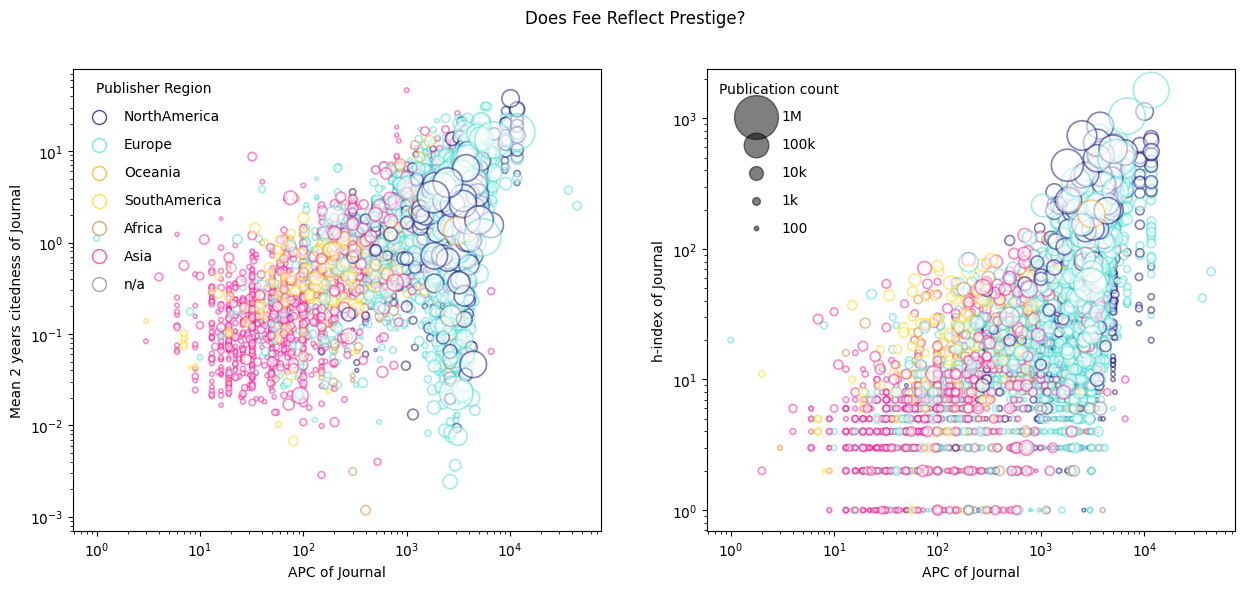

In [43]:
# プロット
fig,ax = plt.subplots(1,2,figsize=(15,6))

ax[0].scatter(sorted["apc_usd"],sorted["2yr_mean_citedness"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors=sorted["color"],linewidth=1.2,alpha=0.5)
ax[0].set_ylabel("Mean 2 years citedness of Journal")
ax[1].scatter(sorted["apc_usd"],sorted["h-index"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors=sorted["color"],linewidth=1.2,alpha=0.5)
ax[1].set_ylabel("h-index of Journal")

for axes in ax:
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlabel("APC of Journal")

# 凡例を表示
legend_color = colors.values()
legend_labels_color = colors.keys()
for color, label in zip(legend_color, legend_labels_color):
    ax[0].scatter([], [], s=100, label=label, color='white',edgecolors=color, alpha=0.7)

legend_sizes = [1000, 316, 100, 31, 10]
legend_labels = ['1M', '100k','10k', '1k', '100']
for size, label in zip(legend_sizes, legend_labels):
    ax[1].scatter([], [], s=size, label=label, color='black', alpha=0.5)
ax[0].legend(scatterpoints=1, frameon=False, labelspacing=1, title='Publisher Region')
ax[1].legend(scatterpoints=1, frameon=False, labelspacing=1, title='Publication count')

plt.suptitle("Does Fee Reflect Prestige?")
plt.show()

# 青がEuropeおよびNorth America、赤がAsia、黄色がGlobal South。

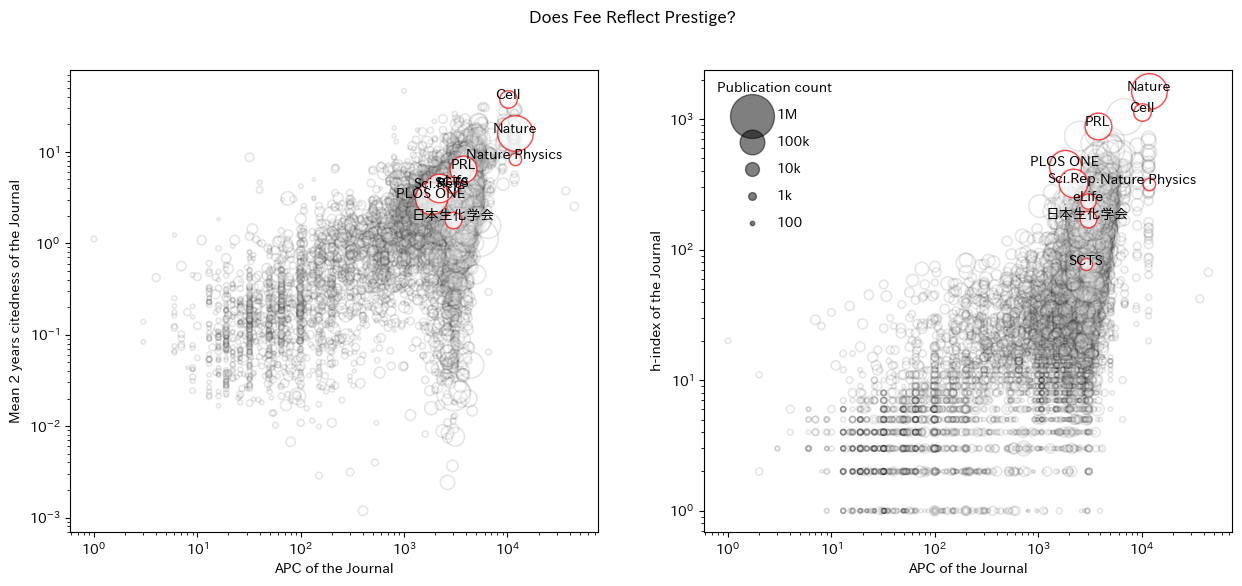

In [46]:
# Prestigous なジャーナルの例をプロット
# なお、SCTS:science china technological sciencesは中国の大手ジャーナル。
# 米大手ジャーナルScienceはAPCを課さない出版形式（購読時に費用が発生するビジネスモデルのみ）のためプロットには登場しない。

prestigous_jounals = ["Nature","Nature Physics","PLOS ONE","Scientific Reports","Physical Review Letters","PubMed","Cell","eLife","Science China Technological Sciences","The Journal of Biochemistry"]
prestigous_jounals_shortname = ["Nature","Nature Physics","PLOS ONE","Sci.Rep.","PRL","PubMed","Cell","eLife","SCTS","日本生化学会"]

label_index = []
for i in range(len(prestigous_jounals)):
    index = sorted[sorted["display_name"]==prestigous_jounals[i]].index
    if(len(index)>0):
        label_index.append(index[0])
    else:
        label_index.append(None)
        prestigous_jounals[i] = ""
        prestigous_jounals_shortname[i] = ""

#         
fig,ax = plt.subplots(1,2,figsize=(15,6))

ax[0].scatter(sorted["apc_usd"],sorted["2yr_mean_citedness"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors='black',linewidth=1.2,alpha=0.1)
ax[0].set_ylabel("Mean 2 years citedness of the Journal")
ax[1].scatter(sorted["apc_usd"],sorted["h-index"],s=sorted["works_count"].apply(lambda x: math.sqrt(x)),c="white", edgecolors='black',linewidth=1.2,alpha=0.1)
ax[1].set_ylabel("h-index of the Journal")

for i,l in enumerate(label_index):
    label = prestigous_jounals_shortname[i]
    if(label!=""):
        x=sorted.loc[l,"apc_usd"]
        size= math.sqrt(sorted.loc[l,"works_count"])
        y1=sorted.loc[l,"2yr_mean_citedness"]
        y2=sorted.loc[l,"h-index"]
        ax[0].annotate(label, (x, y1), textcoords="offset points", xytext=(0,0), ha='center')
        ax[1].annotate(label, (x, y2), textcoords="offset points", xytext=(0,0), ha='center')
        ax[0].scatter(x, y1,c="white",s=size,edgecolors="red",alpha=0.7)
        ax[1].scatter(x, y2,c="white",s=size,edgecolors="red",alpha=0.7)
    
for axes in ax:
    axes.set_xscale('log')
    axes.set_yscale('log')
    axes.set_xlabel("APC of the Journal")

# Custom legend for bubble sizes
legend_sizes = [1000, 316, 100, 31, 10]
legend_labels = ['1M', '100k','10k', '1k', '100']
for size, label in zip(legend_sizes, legend_labels):
    plt.scatter([], [], s=size, label=label, color='black', alpha=0.5)

plt.legend(scatterpoints=1, frameon=False, labelspacing=1, title='Publication count')

plt.suptitle("Does Fee Reflect Prestige?")
plt.show()

# 機関データ

In [47]:
# Institutions
# 日本国内の研究機関、学術組織について、機関全体で合算したh-indexを高い順に10件取得

institution = Institutions().filter(country_code="JP").sort(summary_stats={"h-index":"desc"}).get()

pd.DataFrame(map(lambda x: [x["display_name"], x["summary_stats"]["h_index"],x["id"]],institution),
            columns=["機関名","h-index","id"]).head(10)

,機関名,h-index,id
0,The University of Tokyo,727,https://openalex.org/I74801974
1,Kyoto University,646,https://openalex.org/I22299242
2,Osaka University,598,https://openalex.org/I98285908
3,Japan Science and Technology Agency,544,https://openalex.org/I4210086780
4,Tohoku University,493,https://openalex.org/I201537933
5,Nagoya University,436,https://openalex.org/I60134161
6,Kyushu University,420,https://openalex.org/I135598925
7,National Institute of Advanced Industrial Scie...,392,https://openalex.org/I73613424
8,Tokyo Institute of Technology,391,https://openalex.org/I114531698
9,Tokyo University of Science,389,https://openalex.org/I161296585


In [48]:
# 同様に 機関全体で合算した2年間平均被引用数を高い順に10件取得

institution = Institutions().filter(country_code="JP").sort(summary_stats={"2yr_mean_citedness":"desc"}).get()
pd.DataFrame(map(lambda x: [x["display_name"], x["summary_stats"]["2yr_mean_citedness"],x["id"]],institution),
            columns=["機関名","2年間平均被引用数","id"]).head(10)

,機関名,2年間平均被引用数,id
0,Chiba Prefectural Center Museum Otone Branch,71.000000,https://openalex.org/I4210105858
1,Institute of Applied Energy,20.111111,https://openalex.org/I4210147409
2,Tomita Hospital,18.000000,https://openalex.org/I4210112518
3,Kyushu Economic Research Center,17.818182,https://openalex.org/I4210090332
4,Katsumata Hospital,16.500000,https://openalex.org/I4210143263
5,Japan Chemical Industry Association,15.862069,https://openalex.org/I4210120656
6,Toyama University of International Studies,15.500000,https://openalex.org/I76257533
7,Mitsukoshi Health and Welfare Foundation,14.800000,https://openalex.org/I4210159217
8,Menicon (Japan),13.600000,https://openalex.org/I4210124293
9,Nippon Soda (Japan),13.071429,https://openalex.org/I34165663


In [49]:
# 大学内で成果が出ている分野と、インパクトを与えている分野の分析。
# 分野ごとに被引用数の平均が異なるため、単純に平均被引用数の平均や合計で比較しても、年間出版数の多い計算機科学で高い数値が、出版数の少ない遺伝子工学や数学などで低い数値が得られるだけとなる。
# Revealed Comperative Advantage(比較顕示優位)、つまり分野の被引用数の相対的な割合が、世界平均での割合と比べてどの程度高いかの比で、分野同士を比較できるようになる。
# 横軸に生産性(論文出版数のRCA)、縦軸にインパクト（被引用数のRCA）をとったプロットを描画する。
# 詳細は「研究評価・科学論のための科学計量学入門」(丸善株式会社)などを参照のこと。

institution_id = "https://openalex.org/i125602781" # 医科歯科大学

rca_fields = pd.read_csv("./supplementary/domain_field_mapping.csv").set_index("field_id")
for i in range(11,37): # 全分野 11~37に対して計算
    pyalexObj = Works().filter(institution={"id":institution_id}, from_publication_date="2010-01-01",to_publication_date="2014-12-31",cited_by_count=">0",primary_topic={"field":{"id":i}})
    rca_fields.loc[i, "pub"] = pyalexObj.count()
    if rca_fields.loc[i, "pub"]>20: # 同組織内で論文が少なくとも20本より多く出ている分野に絞る
        citation_counts = pd.DataFrame(util.getAll(pyalexObj.select(["cited_by_count"]), verbous=False))
        rca_fields.loc[i, "cite"] = citation_counts["cited_by_count"].sum()

                                            field_name  domain_id  \
field_id                                                            
11                Agricultural and Biological Sciences          1   
12                                 Arts and Humanities          2   
13        Biochemistry, Genetics and Molecular Biology          1   
14                 Business, Management and Accounting          2   
15                                Chemical Engineering          3   
16                                           Chemistry          3   
17                                    Computer Science          3   
18                                   Decision Sciences          2   
19                        Earth and Planetary Sciences          3   
20                 Economics, Econometrics and Finance          2   
21                                              Energy          3   
22                                         Engineering          3   
23                               E

![Definition of Revealed Comperative Advantage](./supplementary/1_rca.png)

https://unctadstat.unctad.org/EN/RcaRadar.html
より引用

In [50]:
# 世界平均は、同分野内で最大10000本をサンプリングし平均を取得する。
# データの取得には約20分かかるため、今回は事前に用意したデータを使う。

# fields_base = pd.read_csv("./supplementary/domain_field_mapping.csv").set_index("field_id").drop(["field_name","domain_name"], axis="columns")

# for i in range(11,37):
#     pyalexObj = Works().filter(from_publication_date="2010-01-01",to_publication_date="2014-12-31",\
#                                 cited_by_count=">0",\
#                                 # authorships={"institutions":{"country_code":"JP"}},\
#                                 primary_topic={"field":{"id":i}})
#     fields_base.loc[i, "pub"] = pyalexObj.count()
#     sample_count = int(min(10000,fields_base.loc[i, "pub"]))
#     if(sample_count>0):
#         citation_counts = pd.DataFrame(util.getAll(pyalexObj.sample(sample_count,seed=42).select(["cited_by_count"]),verbous=False))
#         fields_base.loc[i, "cite"] = citation_counts["cited_by_count"].sum()

# fields_base.to_pickle("./supplementary/fields_base_10k.pickle")

fields_base = pd.read_pickle("./supplementary/fields_base_10k.pickle")

Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:55,  1.12s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:50,  1.01s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:55,  1.10s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:57,  1.15s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:51,  1.04s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:55,  1.11s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:56,  1.14s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:55,  1.10s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:58,  1.17s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:58,  1.17s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:51,  1.02s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:59,  1.18s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:53,  1.06s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:55,  1.11s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:55,  1.10s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:54,  1.09s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:58,  1.18s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:57,  1.16s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:53,  1.08s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:52,  1.05s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:56,  1.12s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:55,  1.10s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:56,  1.13s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:54,  1.08s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:56,  1.12s/it]


Fetching 10000 objects. it may takes 0.83 to 2.5 minutes


50it [00:56,  1.13s/it]


In [51]:
rca = pd.merge(rca_fields.dropna(), fields_base,how="left", on="field_id")
rca

,field_name,domain_id_x,domain_name,pub_x,cite_x,domain_id_y,pub_y,cite_y
field_id,,,,,,,,
13,"Biochemistry, Genetics and Molecular Biology",1,Life Sciences,1070.0,47342.0,1,903763.0,398183.0
16,Chemistry,3,Physical Sciences,59.0,1553.0,3,313080.0,308639.0
22,Engineering,3,Physical Sciences,229.0,5461.0,3,1813363.0,205292.0
23,Environmental Science,3,Physical Sciences,23.0,710.0,3,616122.0,287929.0
24,Immunology and Microbiology,1,Life Sciences,296.0,16797.0,1,160252.0,380039.0
25,Materials Science,3,Physical Sciences,93.0,2291.0,3,559837.0,364484.0
27,Medicine,4,Health Sciences,2477.0,105341.0,4,2544854.0,295711.0
28,Neuroscience,1,Life Sciences,266.0,10738.0,1,267955.0,391336.0
29,Nursing,4,Health Sciences,24.0,718.0,4,65630.0,273958.0


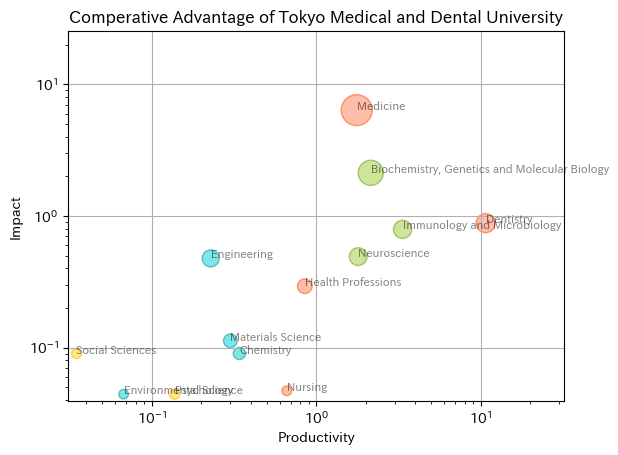

In [52]:
investment = (rca["pub_x"]/rca["pub_x"].sum()) / (rca["pub_y"]/rca["pub_y"].sum())
impact = (rca["cite_x"]/rca["cite_x"].sum()) / (rca["cite_y"]/rca["cite_y"].sum())

x_range = max(math.log10(max(investment)), -math.log10(min(investment)))
y_range = max(math.log10(max(impact)), -math.log10(min(impact)))

# 大分類ごとの色を設定
dark_colors = ['olivedrab','orange' ,'darkcyan', 'orangered'] 
light_colors = [ 'yellowgreen', 'gold','darkturquoise','coral']
colors = rca["domain_id_x"].apply(lambda x: light_colors[x-1])
edgecolors = rca["domain_id_x"].apply(lambda x: dark_colors[x-1])

plt.scatter(investment,impact,s=rca["pub_x"].apply(lambda x: math.sqrt(x)*10),c=colors,edgecolors=edgecolors, alpha=0.5)
labels = rca["field_name"]
title = Institutions()[f'{institution_id.split(sep="/")[-1]}']["display_name"]
for i, txt in enumerate(labels):
    plt.text(investment.iloc[i], impact.iloc[i], txt, fontsize=8,alpha=0.5)

plt.xscale("log")
plt.yscale("log")
plt.title(f"Comperative Advantage of {title}")
plt.xlim(10**(-x_range-0.05),10**(x_range+0.05))
plt.ylim(10**(-y_range-0.05),10**(y_range+0.05))
plt.xlabel("Productivity")
plt.ylabel("Impact")
plt.grid(True)